Extracting EDF parameters from c:\Users\Atharva\Desktop\main_project_EEG\eeg-during-mental-arithmetic-tasks-1.0.0\Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from c:\Users\Atharva\Desktop\main_project_EEG\eeg-during-mental-arithmetic-tasks-1.0.0\Subject00_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


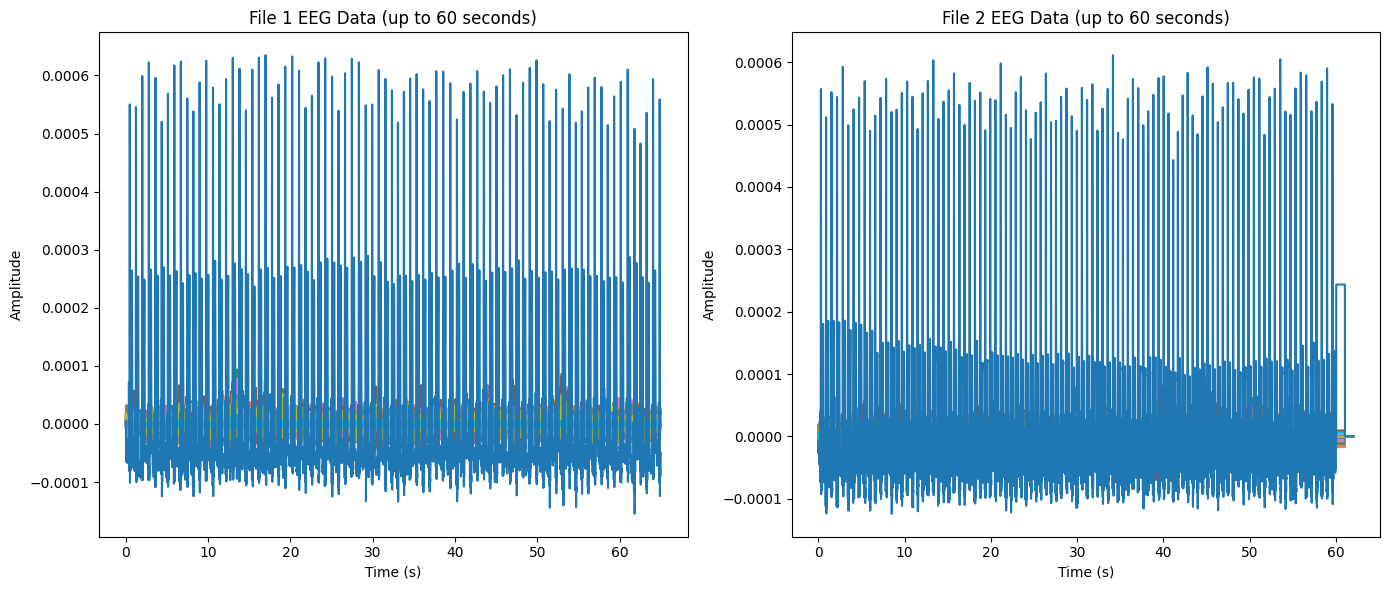

In [13]:
import mne
import matplotlib.pyplot as plt

# Load EDF files
raw1 = mne.io.read_raw_edf(
    './eeg-during-mental-arithmetic-tasks-1.0.0/Subject00_1.edf', preload=True)
raw2 = mne.io.read_raw_edf(
    './eeg-during-mental-arithmetic-tasks-1.0.0/Subject00_2.edf', preload=True)

# Extract data and other info
data1, times1 = raw1[:, :int(65 * raw1.info['sfreq'])]
data2, times2 = raw2[:, :int(65 * raw2.info['sfreq'])]

# Plotting
plt.figure(figsize=(14, 6))  # Adjust the figure size as needed
plt.subplot(1, 2, 1)
plt.plot(times1, data1.T)
plt.title('File 1 EEG Data (up to 60 seconds)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
plt.plot(times2, data2.T)
plt.title('File 2 EEG Data (up to 60 seconds)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [14]:
data2.shape

(21, 31000)

In [15]:
events = mne.find_events(raw1, stim_channel='EEG Fp1')
print(events)

[]


In [9]:
import mne

# Load EDF file
raw1 = mne.io.read_raw_edf(
    './eeg-during-mental-arithmetic-tasks-1.0.0/Subject00_1.edf', preload=True)

# Extract data and info
# Extract first 60 seconds of data
data, times = raw1[:, :int(60 * raw1.info['sfreq'])]

# Create info object for Epochs (since events=None and event_id=None)
info = mne.create_info(ch_names=raw1.ch_names,
                       sfreq=raw1.info['sfreq'], ch_types='eeg')

# Create RawArray object from sliced data
raw_subset = mne.io.RawArray(data, info)

# Define parameters for creating epochs
event_id = None  # No events are present, so set event_id to None
# Start of each epoch (in seconds) relative to the start of raw_subset
tmin = 0
tmax = 2  # End of each epoch (in seconds) relative to the start of raw_subset

# Create fixed-length epochs for the first 60 seconds of data
epochs = mne.Epochs(raw_subset, events=None, event_id=event_id,
                    tmin=tmin, tmax=tmax, baseline=None, preload=True)

# Print some information about epochs
print(epochs)

Extracting EDF parameters from c:\Users\Atharva\Desktop\main_project_EEG\eeg-during-mental-arithmetic-tasks-1.0.0\Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Creating RawArray with float64 data, n_channels=21, n_times=30000
    Range : 0 ... 29999 =      0.000 ...    59.998 secs
Ready.


RuntimeError: No usable annotations found in the raw object. Either `events` must be provided or the raw object must have annotations to construct epochs

In [249]:
import mne
import numpy as np

import os

import matplotlib.pyplot as plt
from scipy.signal import welch

from sklearn.utils import resample

In [250]:
directory = './eeg-during-mental-arithmetic-tasks-1.0.0/'

rest_filepaths = []
task_filepaths = []

for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    if filename.endswith('.edf'):
        label = filename.split('_')[-1].split('.')[0]

        if label == '1':
            rest_filepaths.append(filepath)
        else:
            task_filepaths.append(filepath)

In [251]:
fs = 500  # Sampling frequency
# epoch_length = 1  # Length of each epoch in seconds
# nperseg = epoch_length * fs  # Number of data points per segment for FFT

# Function to calculate PSD for each channel


def calculate_psd(data):

    _, psd = welch(data, fs=fs, nperseg=2048)
    return psd

In [252]:


def read_data(filepath):
    data = mne.io.read_raw_edf(filepath, preload=True)
    data.set_eeg_reference()

    data.filter(l_freq=0.5, h_freq=45)
    epochs = mne.make_fixed_length_epochs(data, duration=1, overlap=0.5)
    array = epochs.get_data()
    array = array[:123, :, :]

    # Initialize array to store PSD results (epochs x channels x frequency_bins)
    # 129 frequency bins for welch method
    psd_array = np.zeros((123, len(data.ch_names), 129))

    # Calculate PSD for each epoch and channel
    for i in range(0, 123):
        for j, channel_data in enumerate(array[i]):
            _, psd = welch(channel_data, fs=data.info['sfreq'])
            psd_array[i, j, :] = psd
    print(psd_array.shape)
    return psd_array

In [253]:
trail = read_data(rest_filepaths[0])

Extracting EDF parameters from c:\Users\Atharva\Desktop\main_project_EEG\eeg-during-mental-arithmetic-tasks-1.0.0\Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
363 matching events found
No bas

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


(123, 21, 129)


In [254]:
%%capture
rest_epochs_array = [read_data(filepath) for filepath in rest_filepaths]
task_epochs_array = [read_data(filepath) for filepath in task_filepaths]

In [255]:
rest_epochs_array[0].shape, task_epochs_array[0].shape

((123, 21, 129), (123, 21, 129))

In [256]:
rest_epochs_array[0].shape

(123, 21, 129)

In [257]:
# Labels:
rest_label = [len(i)*[0] for i in rest_epochs_array]
task_label = [len(i)*[1] for i in task_epochs_array]

In [258]:
len(task_label), len(task_label[0])

(36, 123)

In [259]:
all_epochs = rest_epochs_array + task_epochs_array
all_labels = rest_label + task_label

In [260]:
len(all_epochs), len(all_epochs[0]), len(all_epochs[0][0])

(72, 123, 21)

In [261]:
len(all_labels), len(all_labels[0])

(72, 123)

In [262]:
group_list = [[i]*len(j) for i, j in enumerate(all_epochs)]

In [263]:
data_array = np.vstack(all_epochs)
label_array = np.hstack(all_labels)
group_array = np.hstack(group_list)

In [264]:
print(data_array.shape, label_array.shape, group_array.shape)

(8856, 21, 129) (8856,) (8856,)


In [265]:
data_array = np.moveaxis(data_array, 1, 2)
data_array.shape

(8856, 129, 21)

In [266]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Permute, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import SeparableConv2D, DepthwiseConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import SpatialDropout2D
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import backend as K


from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Example function for EEGNet model


def EEGNet(nb_classes, Chans=21, Samples=500,
           dropoutRate=0.25, kernLength=16, F1=64,
           D=2, F2=16, norm_rate=0.25, dropoutType='Dropout'):

    if dropoutType == 'SpatialDropout2D':
        dropoutType = SpatialDropout2D
    elif dropoutType == 'Dropout':
        dropoutType = Dropout
    else:
        raise ValueError('dropoutType must be one of SpatialDropout2D '
                         'or Dropout, passed as a string.')

    input1 = Input(shape=(Chans, Samples, 1))

    ##################################################################
    block1 = Conv2D(F1, (1, 64), padding='same', use_bias=False)(input1)
    block1 = BatchNormalization()(block1)
    block1 = DepthwiseConv2D((21, 1), use_bias=False,
                             depth_multiplier=D)(block1)
    block1 = BatchNormalization()(block1)
    block1 = Activation('elu')(block1)
    block1 = AveragePooling2D((1, 4))(block1)
    block1 = dropoutType(dropoutRate)(block1)

    block2 = SeparableConv2D(
        F2, (1, 16), padding='same', use_bias=True)(block1)
    block2 = BatchNormalization()(block2)
    block2 = Activation('elu')(block2)
    block2 = AveragePooling2D((1, 8))(block2)
    block2 = dropoutType(dropoutRate)(block2)

    flatten = Flatten(name='flatten')(block2)
    dense = Dense(nb_classes, name='dense')(flatten)
    softmax = Activation('softmax', name='softmax')(dense)

    return Model(inputs=input1, outputs=softmax)


# Define cross-validation strategy
gkf = GroupKFold(n_splits=5)  # Example of 5-fold cross-validation


accuracy = []
test_accuracy = []

# Loop over each fold
for train_index, test_index in gkf.split(data_array, label_array, groups=group_array):
    # Split data into train and test for this fold
    train_data, test_data = data_array[train_index], data_array[test_index]
    train_labels, test_labels = label_array[train_index], label_array[test_index]

    # Split train data further into train and validation for this fold
    train_features, val_features, train_labels, val_labels = train_test_split(
        train_data, train_labels, test_size=0.2)

    # Preprocess data
    scaler = StandardScaler()
    train_features = scaler.fit_transform(
        train_features.reshape(-1, train_features.shape[-1])).reshape(train_features.shape)
    val_features = scaler.transform(
        val_features.reshape(-1, val_features.shape[-1])).reshape(val_features.shape)
    test_features = scaler.transform(
        test_data.reshape(-1, test_data.shape[-1])).reshape(test_data.shape)

    train_features = np.moveaxis(train_features, 1, 2)
    val_features = np.moveaxis(val_features, 1, 2)
    test_features = np.moveaxis(test_features, 1, 2)

    train_features = np.reshape(train_features, (*train_features.shape, 1))
    val_features = np.reshape(val_features, (*val_features.shape, 1))
    test_features = np.reshape(test_features, (*test_features.shape, 1))

    # Convert labels to one-hot encoding
    num_classes = 2  # Example number of classes
    train_labels_onehot = np.zeros((train_labels.size, num_classes))
    train_labels_onehot[np.arange(train_labels.size), train_labels] = 1

    val_labels_onehot = np.zeros((val_labels.size, num_classes))
    val_labels_onehot[np.arange(val_labels.size), val_labels] = 1

    test_labels_onehot = np.zeros((test_labels.size, num_classes))
    test_labels_onehot[np.arange(test_labels.size), test_labels] = 1

    # Initialize model
    model = EEGNet(num_classes, Chans=21, Samples=129)

    # Compile model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train model on current fold's train and validation data
    model.fit(train_features, train_labels_onehot, epochs=10,
              batch_size=64, validation_data=(val_features, val_labels_onehot))

    # Evaluate model on test data for this fold
    test_loss, test_acc = model.evaluate(test_features, test_labels_onehot)
    test_accuracy.append(test_acc)

# After all folds, print average test accuracy
print("Average Test Accuracy:", np.mean(test_accuracy))

Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.6202 - loss: 0.6623 - val_accuracy: 0.5089 - val_loss: 0.6907
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.6866 - loss: 0.5921 - val_accuracy: 0.6358 - val_loss: 0.6738
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.7249 - loss: 0.5450 - val_accuracy: 0.6315 - val_loss: 0.6367
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.7578 - loss: 0.5065 - val_accuracy: 0.7591 - val_loss: 0.5476
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.7760 - loss: 0.4776 - val_accuracy: 0.7769 - val_loss: 0.4714
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.7924 - loss: 0.4570 - val_accuracy: 0.7890 - val_loss: 0.4460
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.7918 - loss: 0.4483 - val_accuracy: 0.8097 - val_loss: 0.4113
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.8059 - loss: 0.4245 - val_accuracy: 0.8047 - v